# Task
Analyze content trends on Netflix using the dataset from "/content/Netflix Dataset.csv" to provide strategic recommendations.

## Analyze country-wise content distribution

### Subtask:
Analyze the distribution of content across different countries.

**Reasoning**:
Split the 'Country' column, explode the resulting list, count the occurrences of each country, select the top N countries, and then create and display a bar plot of the content distribution across these top countries with appropriate labels and title.

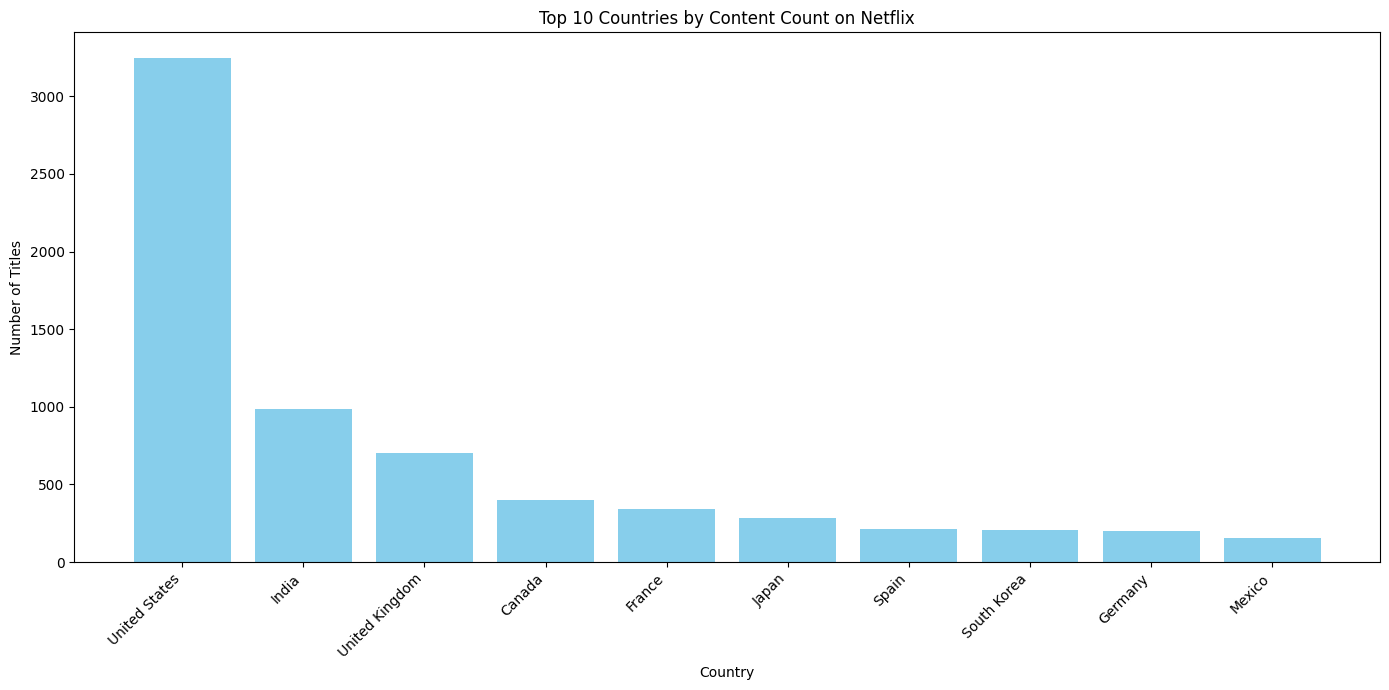

In [12]:
df_countries = df.copy()
df_countries['Country'] = df_countries['Country'].str.split(', ')
df_countries = df_countries.explode('Country')

country_counts = df_countries['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Content_Count']

top_n_countries = 10 # Choosing a reasonable value for N
top_countries_df = country_counts.head(top_n_countries)

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.bar(top_countries_df['Country'], top_countries_df['Content_Count'], color='skyblue')
plt.title(f'Top {top_n_countries} Countries by Content Count on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze genre trends

### Subtask:
Analyze the trends in different genres over the years.

**Reasoning**:
Split the 'Type' column, create a new DataFrame with genres and release years, group and count genre occurrences per year, select the top N genres, and create a line plot to visualize their trends over the years.

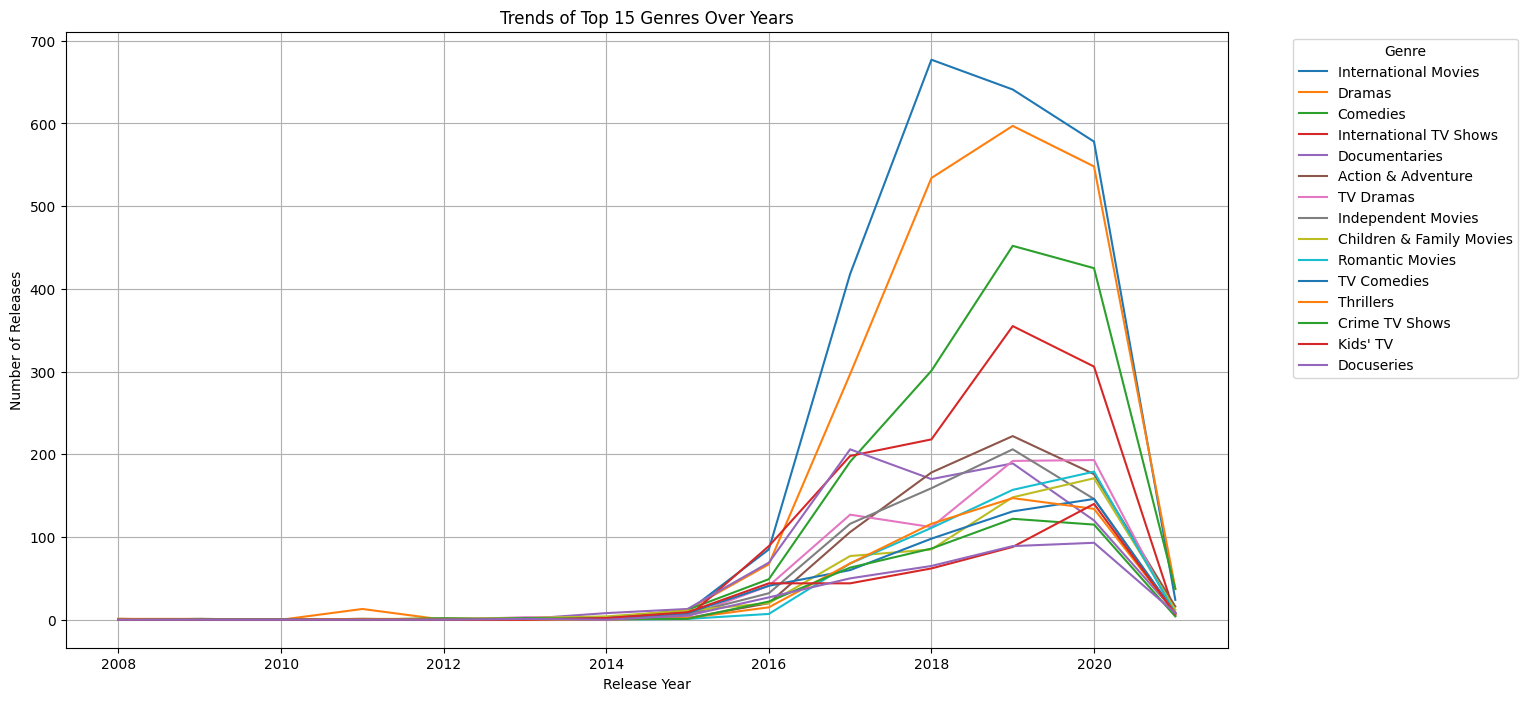

In [11]:
df_genres = df.copy()
df_genres['Genre'] = df_genres['Type'].str.split(', ')
df_genres = df_genres.explode('Genre')

genre_year_counts = df_genres.groupby(['Release_Year', 'Genre']).size().unstack(fill_value=0)

top_n = 15
top_genres = genre_year_counts.sum().sort_values(ascending=False).head(top_n).index

genre_year_counts_top = genre_year_counts[top_genres]

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
genre_year_counts_top.plot(kind='line', ax=plt.gca())
plt.title(f'Trends of Top {top_n} Genres Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Load the data

### Subtask:
Load the dataset from "/content/Netflix Dataset.csv" into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the dataset into a DataFrame, then display the first few rows.



,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


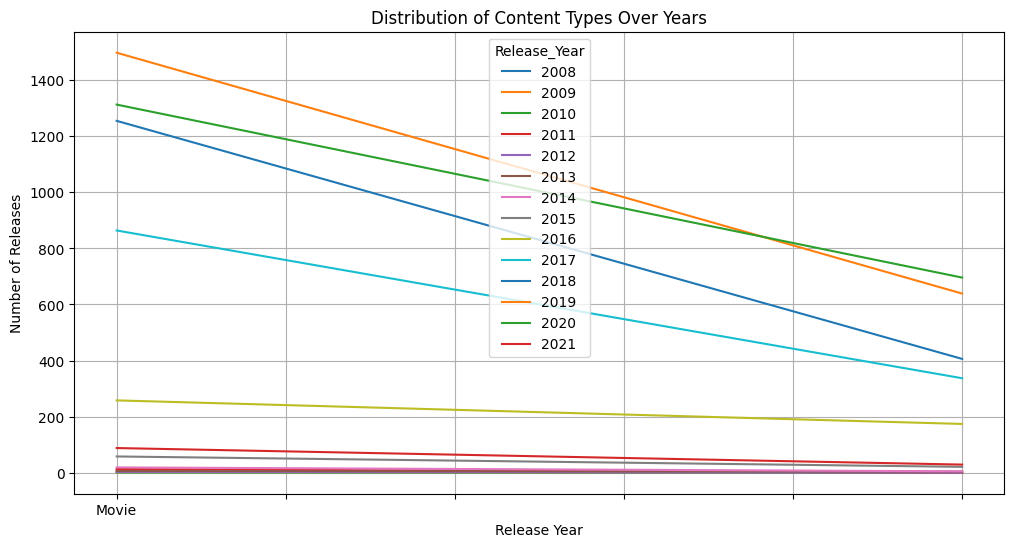

In [10]:
import pandas as pd
df = pd.read_csv('/content/Netflix Dataset.csv')
display(df.head())

df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df.dropna(subset=['Release_Date'], inplace=True)
df['Release_Year'] = df['Release_Date'].dt.year.astype(int)

category_year_counts = df.groupby(['Category', 'Release_Year']).size().unstack(fill_value=0)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
category_year_counts.plot(kind='line', ax=plt.gca())
plt.title('Distribution of Content Types Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

## Explore and preprocess the data

### Subtask:
Perform exploratory data analysis, including checking for missing values, data types, and summary statistics. Handle any necessary data cleaning and transformations.


**Reasoning**:
Display data types, check for missing values, display summary statistics, and display unique values for each column in the DataFrame.



In [2]:
display(df.info())
display(df.isnull().sum())
display(df.describe())
display(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


None

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


,0
Show_Id,7787
Category,2
Title,7787
Director,4050
Cast,6831
Country,681
Release_Date,1565
Rating,14
Duration,216
Type,492


## Analyze content type distribution

### Subtask:
Analyze the distribution of content types (Movies vs. TV Shows) over the years.


**Reasoning**:
The first step is to group the DataFrame by the 'Category' column and count the number of entries to understand the overall distribution of content types.



,count
Category,
Movie,5379
TV Show,2312


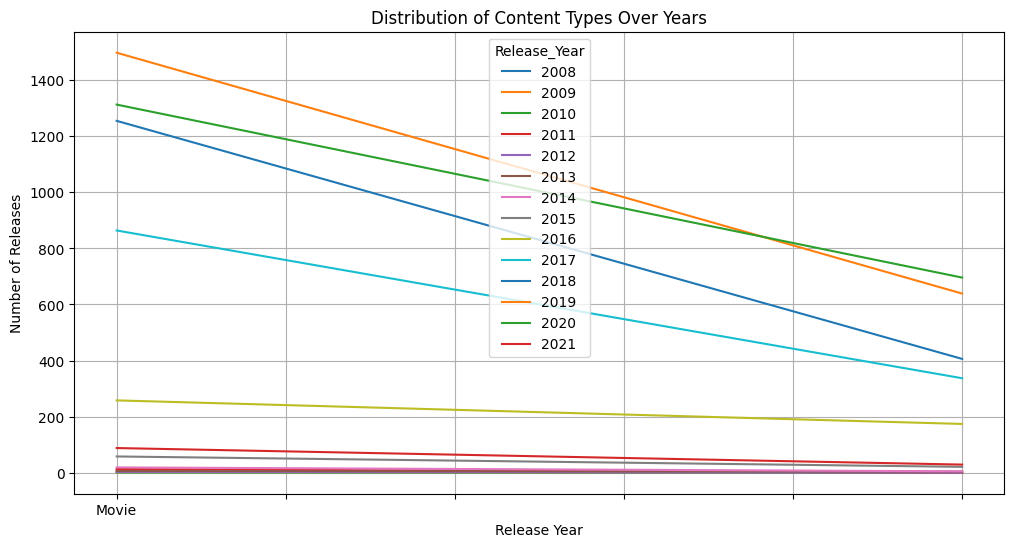

In [13]:
category_counts = df['Category'].value_counts()
display(category_counts)

df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df.dropna(subset=['Release_Date'], inplace=True)
df['Release_Year'] = df['Release_Date'].dt.year.astype(int)

category_year_counts = df.groupby(['Category', 'Release_Year']).size().unstack(fill_value=0)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
category_year_counts.plot(kind='line', ax=plt.gca())
plt.title('Distribution of Content Types Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

**Reasoning**:
The previous attempt to convert the 'Release_Date' column to datetime objects failed because the format was not consistent. I will use the `errors='coerce'` option to handle the parsing errors by setting invalid parsing as NaT (Not a Time). Then I will proceed with the rest of the steps to extract the year, group the data, unstack it, and plot the results.



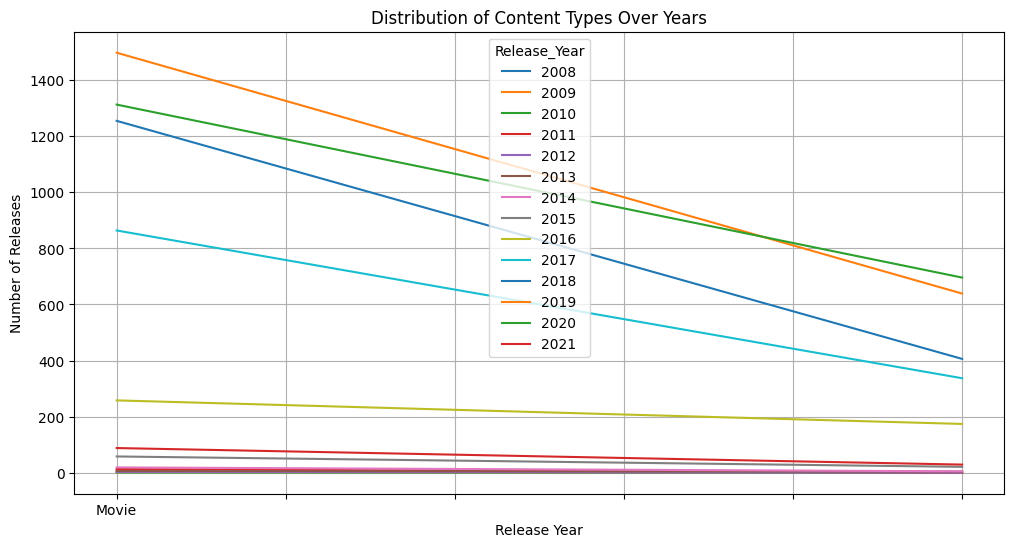

In [4]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df.dropna(subset=['Release_Date'], inplace=True)
df['Release_Year'] = df['Release_Date'].dt.year.astype(int)

category_year_counts = df.groupby(['Category', 'Release_Year']).size().unstack(fill_value=0)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
category_year_counts.plot(kind='line', ax=plt.gca())
plt.title('Distribution of Content Types Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

## Analyze genre trends

### Subtask:
Analyze the trends in different genres over the years.


**Reasoning**:
Split the 'Type' column, create a new DataFrame with genres and release years, group and count genre occurrences per year, select the top N genres, and create a line plot to visualize their trends over the years.



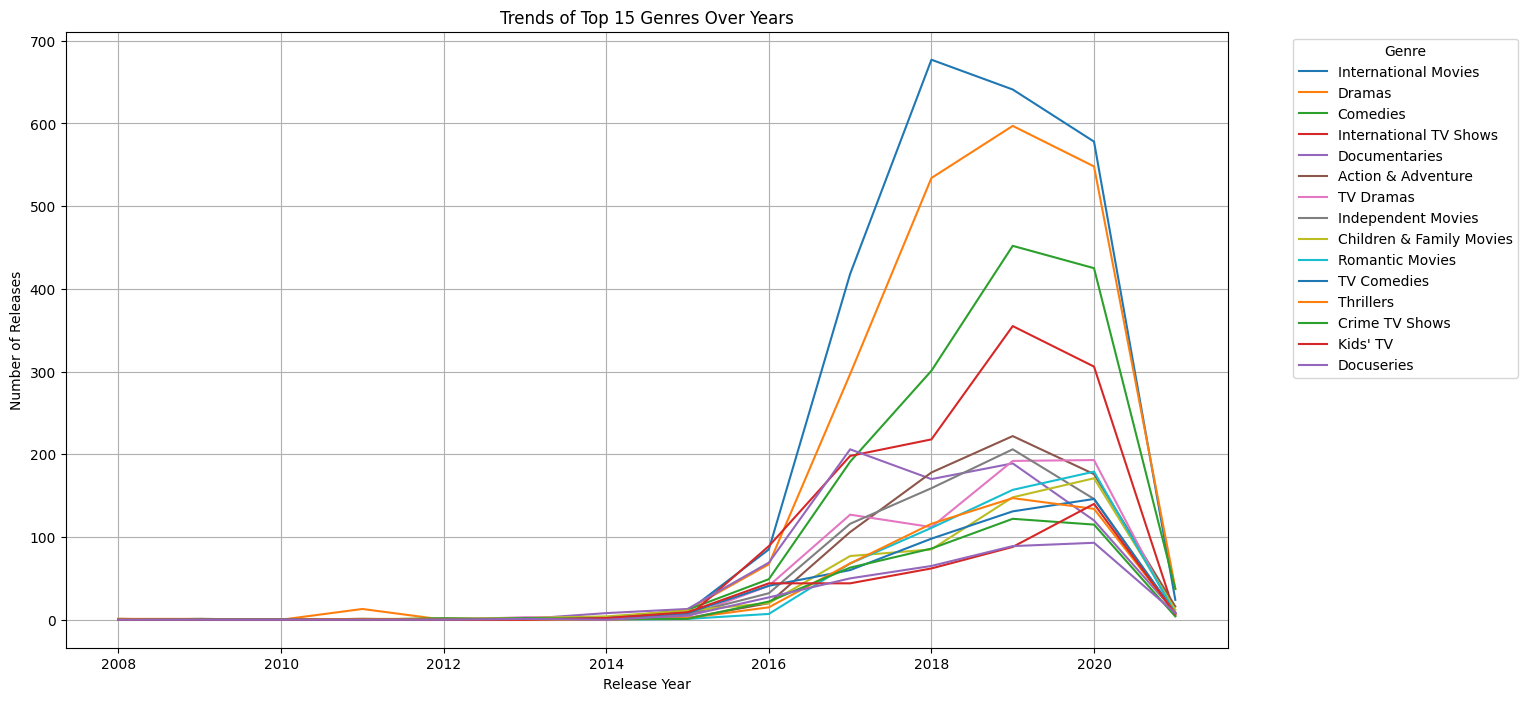

In [5]:
df_genres = df.copy()
df_genres['Genre'] = df_genres['Type'].str.split(', ')
df_genres = df_genres.explode('Genre')

genre_year_counts = df_genres.groupby(['Release_Year', 'Genre']).size().unstack(fill_value=0)

top_n = 15
top_genres = genre_year_counts.sum().sort_values(ascending=False).head(top_n).index

genre_year_counts_top = genre_year_counts[top_genres]

plt.figure(figsize=(15, 8))
genre_year_counts_top.plot(kind='line', ax=plt.gca())
plt.title(f'Trends of Top {top_n} Genres Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Analyze country-wise content distribution

### Subtask:
Analyze the distribution of content across different countries.


**Reasoning**:
Split the 'Country' column, explode the resulting list, count the occurrences of each country, select the top N countries, and then create and display a bar plot of the content distribution across these top countries with appropriate labels and title.



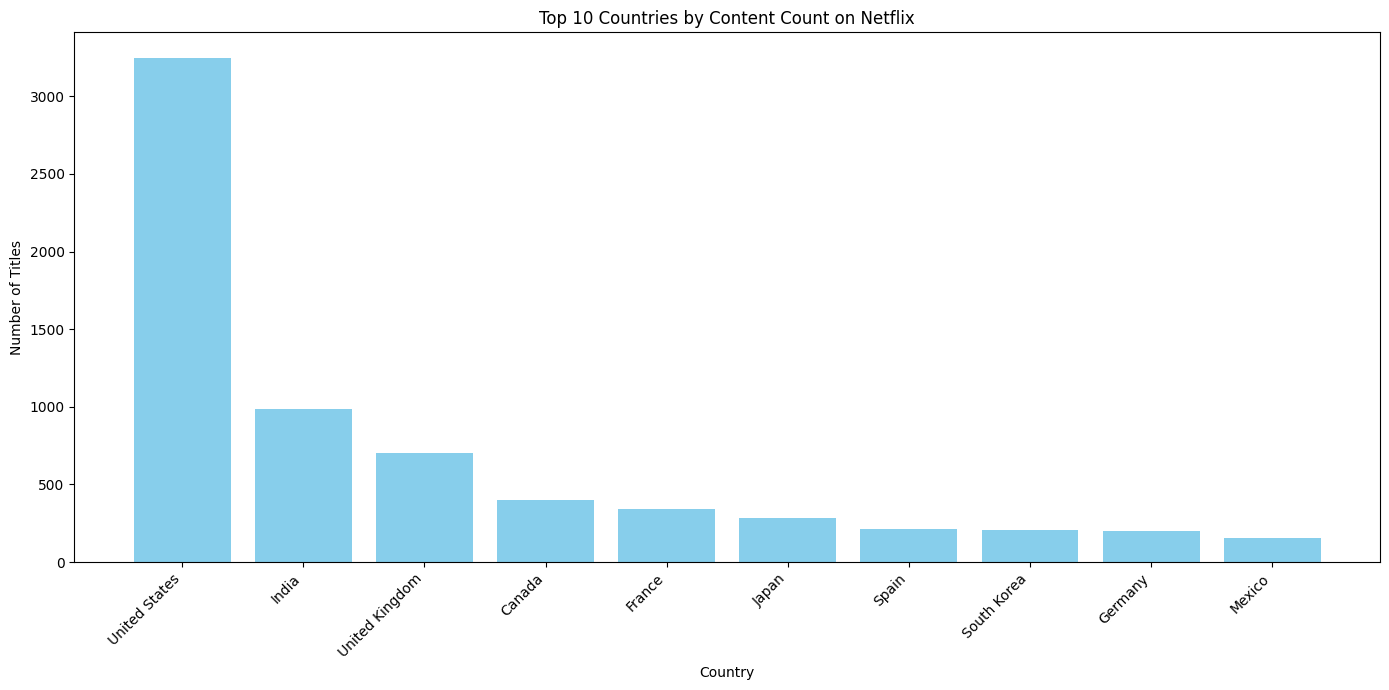

In [6]:
df_countries = df.copy()
df_countries['Country'] = df_countries['Country'].str.split(', ')
df_countries = df_countries.explode('Country')

country_counts = df_countries['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Content_Count']

top_n_countries = 10 # Choosing a reasonable value for N
top_countries_df = country_counts.head(top_n_countries)

plt.figure(figsize=(14, 7))
plt.bar(top_countries_df['Country'], top_countries_df['Content_Count'], color='skyblue')
plt.title(f'Top {top_n_countries} Countries by Content Count on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze release year trends

### Subtask:
Analyze the trends in the release year of content.


**Reasoning**:
Calculate the number of releases for each year, sort them, and then create a line plot to visualize the trend.



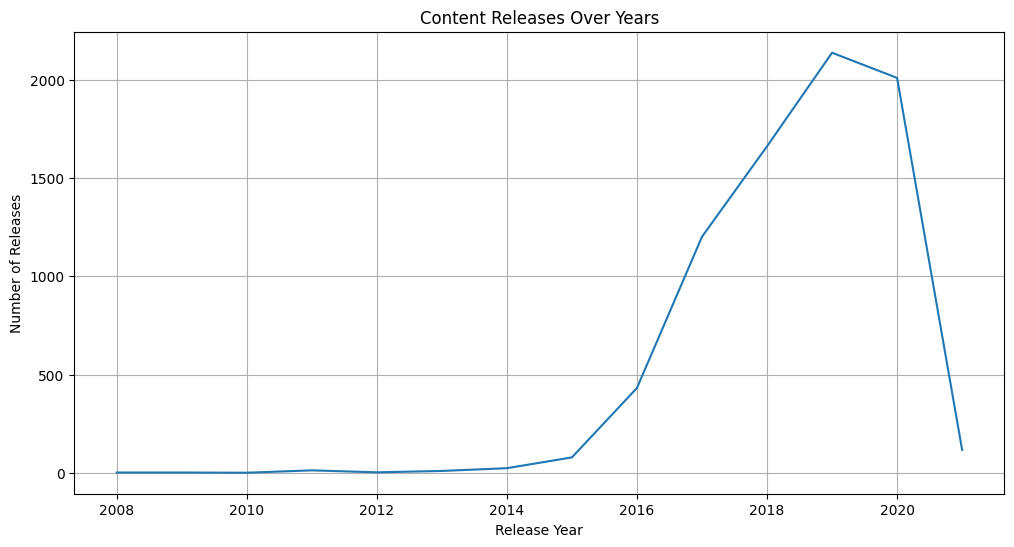

In [7]:
release_year_counts = df['Release_Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
release_year_counts.plot(kind='line')
plt.title('Content Releases Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

## Analyze rating trends

### Subtask:
Analyze the distribution and trends of content ratings.


**Reasoning**:
Calculate the value counts for the 'Rating' column and display the result.



In [8]:
rating_counts = df['Rating'].value_counts()
display(rating_counts)

,count
Rating,
TV-MA,2841
TV-14,1904
TV-PG,781
R,665
PG-13,386
TV-Y,273
TV-Y7,267
PG,247
TV-G,186


## Summarize and recommend

### Subtask:
Summarize the key findings from the analysis and provide strategic recommendations based on the identified content trends.


**Reasoning**:
Review the previous analysis results and synthesize the key findings to formulate strategic recommendations.



In [9]:
print("Key Findings from Netflix Content Analysis:")
print("\n1. Content Type Distribution:")
display(category_counts)
print("\nTrend over years:")
display(category_year_counts)

print("\n2. Genre Trends (Top 15):")
display(genre_year_counts_top)

print("\n3. Country-wise Content Distribution (Top 10):")
display(top_countries_df)

print("\n4. Release Year Trends:")
display(release_year_counts)

print("\n5. Rating Trends:")
display(rating_counts)

print("\nStrategic Recommendations:")
print("- Continue to invest heavily in both Movies and TV Shows, as both categories show significant growth, particularly in recent years.")
print("- Focus on producing and acquiring content in the top-performing genres, such as International Movies, Dramas, Comedies, and International TV Shows, leveraging the identified growth trends.")
print("- Explore further partnerships and content acquisition opportunities in countries with high content volume, like the United States, India, and the United Kingdom, while also investigating the potential for growth in emerging markets.")
print("- Capitalize on the increasing trend of content releases by maintaining a robust production and acquisition pipeline.")
print("- Consider the popularity of different ratings, with a significant portion of content being TV-MA and TV-14, and tailor content strategies to cater to these audiences while also exploring opportunities in other rating categories based on market demand.")

Key Findings from Netflix Content Analysis:

1. Content Type Distribution:


,count
Category,
Movie,5379
TV Show,2410



Trend over years:


Release_Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Category,,,,,,,,,,,,,,
Movie,1,2,1,13,3,6,19,58,258,864,1255,1498,1313,88
TV Show,1,0,0,0,0,4,5,21,174,337,406,639,696,29



2. Genre Trends (Top 15):


Genre,International Movies,Dramas,Comedies,International TV Shows,Documentaries,Action & Adventure,TV Dramas,Independent Movies,Children & Family Movies,Romantic Movies,TV Comedies,Thrillers,Crime TV Shows,Kids' TV,Docuseries
Release_Year,,,,,,,,,,,,,,,
2008,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2009,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011,1,13,0,0,0,0,0,0,1,0,0,1,0,0,0
2012,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0
2013,0,0,1,1,1,0,3,0,2,0,0,0,2,0,1
2014,2,0,2,0,8,1,3,0,4,0,2,0,1,2,0
2015,10,12,12,3,13,2,4,7,11,1,8,2,1,9,5
2016,85,67,49,89,69,20,41,32,20,7,41,15,22,44,27



3. Country-wise Content Distribution (Top 10):


,Country,Content_Count
0,United States,3250
1,India,989
2,United Kingdom,703
3,Canada,399
4,France,345
5,Japan,283
6,Spain,211
7,South Korea,207
8,Germany,198
9,Mexico,154



4. Release Year Trends:


,count
Release_Year,
2008,2
2009,2
2010,1
2011,13
2012,3
2013,10
2014,24
2015,79
2016,432



5. Rating Trends:


,count
Rating,
TV-MA,2841
TV-14,1904
TV-PG,781
R,665
PG-13,386
TV-Y,273
TV-Y7,267
PG,247
TV-G,186



Strategic Recommendations:
- Continue to invest heavily in both Movies and TV Shows, as both categories show significant growth, particularly in recent years.
- Focus on producing and acquiring content in the top-performing genres, such as International Movies, Dramas, Comedies, and International TV Shows, leveraging the identified growth trends.
- Explore further partnerships and content acquisition opportunities in countries with high content volume, like the United States, India, and the United Kingdom, while also investigating the potential for growth in emerging markets.
- Capitalize on the increasing trend of content releases by maintaining a robust production and acquisition pipeline.
- Consider the popularity of different ratings, with a significant portion of content being TV-MA and TV-14, and tailor content strategies to cater to these audiences while also exploring opportunities in other rating categories based on market demand.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 7789 entries and 11 columns, with missing values in 'Director' (2388), 'Cast' (718), 'Country' (507), 'Release\_Date' (10), and 'Rating' (7) columns.
*   The initial overall distribution of content types shows significantly more Movies (5379) compared to TV Shows (2410).
*   The number of content releases on Netflix, for both Movies and TV Shows, shows a significant upward trend over the years, with a clear acceleration in more recent years.
*   The analysis of genre trends identified the top 15 genres, and their volume has changed over time, indicating shifts in content focus.
*   The distribution of content across countries shows that the United States, India, and the United Kingdom have the highest content volume on Netflix.
*   The distribution of content ratings shows that 'TV-MA' is the most frequent rating, followed by 'TV-14' and 'TV-PG'.

### Insights or Next Steps

*   Netflix should continue to invest heavily in both Movies and TV Shows, leveraging the identified growth trends in both categories.
*   Focus content acquisition and production on top-performing genres such as International Movies, Dramas, Comedies, and International TV Shows, while exploring opportunities in emerging markets based on country-wise distribution.
